# King County House Sales Data Analysis

## Overview

This project explores different components of location and details of homes in King County, which is located in Washington state of the U.S. Regression modeling to analyze house sales shows that the model can be used by real estate agents to predict the price of homes based on a set of location and house features. My partner, Jonny Hofmeister, will focus on models built from location features. This notebook will analyze models based from home features. In addition, both notebooks will follow the CRISP-DM Data Science Process with the exception of Deployment since it is outside the scope of this project. A shared notebook will combine and summarize analysis from both Jonny's and this notebook. 

## Business Understanding

The goal of this analysis is to create models that can be used to describe the influence of location and home features on the price. The stakeholder, a real estate agency, should be able to assist homeowners who are looking to buy and sell homes in King County. By understanding the house sales data, the real estate agency can give useful advice to homeowners on how location and characteristics of the home might increase the estimated value of their homes or what features to focus on when discussing budget. The models outlined will predict home prices based on selected features from data given for this analysis project. 

## Data Understanding


The King County House Sales dataset includes over 20,000 unique homes with details such as in what zipcode the house is located to the number of bedrooms and bathrooms in each home. The dataset includes the greater Seattle area of Washington. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As seen above, descriptive statistics for all features in the dataset are shown. However, this notebook will focus on most of the home specific ones. By doing so, this could limit how location-based features affect price in relationship to home features. We will discuss this more in the combined analysis.

## Data Preparation

The target is to predict price of the home. This analysis looks specifically at features of the home, such as number of bedrooms. As mentioned, location features will be the focus of Jonny's analysis. 

We've both prepared the data through the same process to remain consistent. Due to the scope of the project, not all home features are included.

In [6]:
#33 bedrooms is probably a typo...removing this from the dataset
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
df = df[df['bedrooms'] < 33]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [9]:
#checking for any duplicate homes and removing those
df.duplicated('id').value_counts()

False    21419
True       177
dtype: int64

In [10]:
df.drop_duplicates(subset='id', inplace=True)

In [11]:
#checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#waterfront has null values, this feature is examined by Jonny but for consistency, removing this from the dataset
df.dropna(subset=['waterfront'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19066 non-null  int64  
 1   date           19066 non-null  object 
 2   price          19066 non-null  float64
 3   bedrooms       19066 non-null  int64  
 4   bathrooms      19066 non-null  float64
 5   sqft_living    19066 non-null  int64  
 6   sqft_lot       19066 non-null  int64  
 7   floors         19066 non-null  float64
 8   waterfront     19066 non-null  float64
 9   view           19009 non-null  float64
 10  condition      19066 non-null  int64  
 11  grade          19066 non-null  int64  
 12  sqft_above     19066 non-null  int64  
 13  sqft_basement  19066 non-null  object 
 14  yr_built       19066 non-null  int64  
 15  yr_renovated   15690 non-null  float64
 16  zipcode        19066 non-null  int64  
 17  lat            19066 non-null  float64
 18  long  

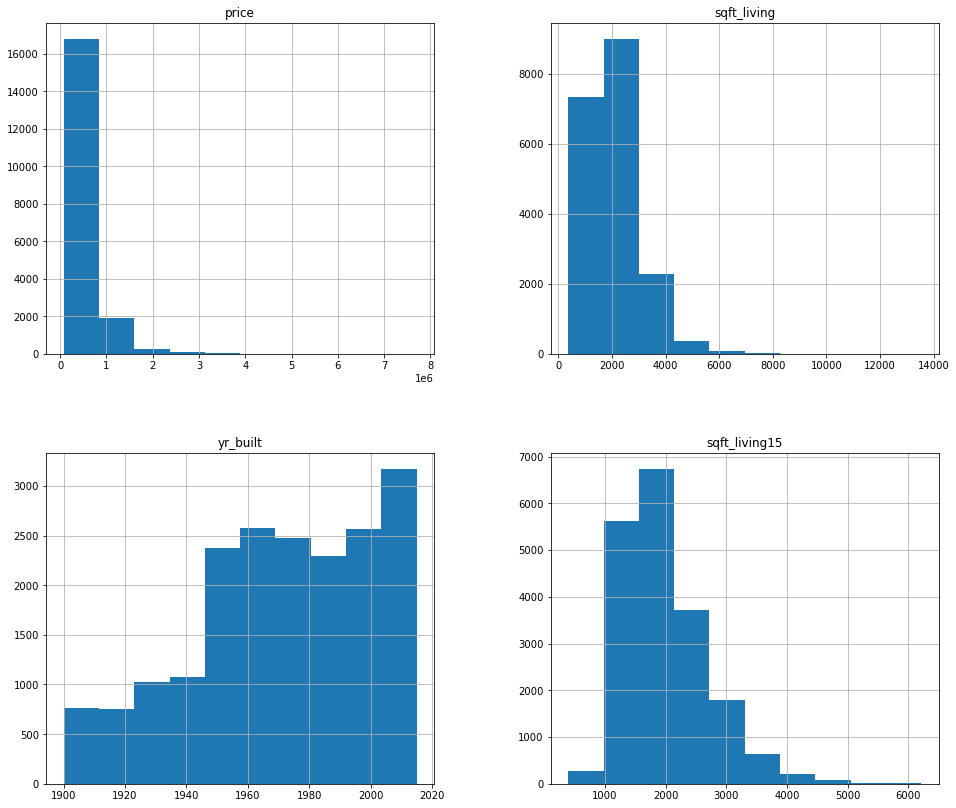

In [14]:
#examining the distribution of each continuous feature I'm interested in by plotting histograms
df[['price', 'sqft_living', 'yr_built', 'sqft_living15']].hist(figsize = [16, 14]);

I can see that these features are slightly skewed, so I will log transform them.

In [15]:
continuous = ['price', 'sqft_living', 'yr_built', 'sqft_living15']
df_cont = df[continuous]

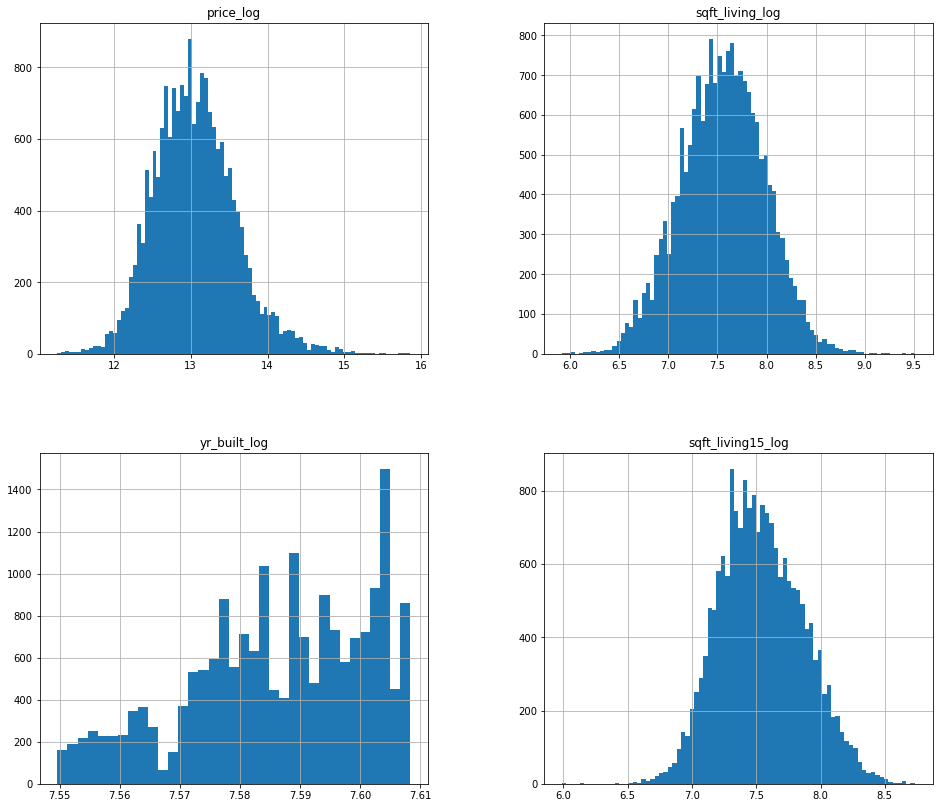

In [16]:
log_fts = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_fts
df_log.hist(figsize=(16, 14), bins='auto');

Now that these features look more normally distributed, I'll add these into a dataframe with the other features I'm interested in exploring for the model.

In [17]:
other_fts = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
df = pd.concat([other_fts, df_log], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           19066 non-null  int64  
 1   bathrooms          19066 non-null  float64
 2   floors             19066 non-null  float64
 3   condition          19066 non-null  int64  
 4   grade              19066 non-null  int64  
 5   price_log          19066 non-null  float64
 6   sqft_living_log    19066 non-null  float64
 7   yr_built_log       19066 non-null  float64
 8   sqft_living15_log  19066 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.5 MB


## Modeling

There will be an initial baseline model and then three difference iterations or refinements to the model. To begin, I am splitting my dataframe to the target and predictors. I then split the dataframe into a train-test-split.  

### Initial Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
import statsmodels.api as sm
import functions as fn

In [21]:
y = df['price_log']
X = df.drop('price_log', axis=1)

In [22]:
#splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [23]:
fir_cols = [
    'bedrooms', 'bathrooms', 'floors', 'condition', 'grade',
    'sqft_living_log', 'yr_built_log', 'sqft_living15_log'
]

fir_df = X_train[fir_cols]

fir_df_test = X_test[fir_cols]

In [24]:
fir_df.head(3)

,bedrooms,bathrooms,floors,condition,grade,sqft_living_log,yr_built_log,sqft_living15_log
14061,3,2.25,2.0,3,8,7.644919,7.592366,7.473069
2795,4,1.75,1.0,5,6,7.590852,7.574558,7.687080
21015,3,2.50,2.0,3,7,7.522941,7.605890,7.522941


In [25]:
scaler = StandardScaler()

fir_X_scaled = scaler.fit_transform(fir_df)
fir_X_scaled_df = pd.DataFrame(fir_X_scaled, columns=fir_df.columns)

X_test_scaled = scaler.transform(fir_df_test)

In [26]:
fir_X_scaled_df.head(3)

,bedrooms,bathrooms,floors,condition,grade,sqft_living_log,yr_built_log,sqft_living15_log
0,-0.413894,0.165815,0.931725,-0.629047,0.278403,0.211883,0.408055,-0.212022
1,0.693360,-0.481732,-0.921228,2.456098,-1.416674,0.084758,-0.778791,0.440700
2,-0.413894,0.489589,0.931725,-0.629047,-0.569136,-0.074918,1.309395,-0.059915


In [27]:
model_one = sm.OLS(y_train, sm.add_constant(fir_X_scaled)).fit()

model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3263.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:32:37   Log-Likelihood:                -3768.3
No. Observations:               14299   AIC:                             7555.
Df Residuals:                   14290   BIC:                             7623.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0534      0.003   4954.774      0.000      13.048      13.059
x1            -0.0401      0.004    -11.248      0.000      -0.047      -0.033
x2             0.0770      0.005     16.542      0.000       0.068       0.086
x3             0.0474      0.003     14.307      0.000       0.041       0.054
x4             0.0266      0.003      9.293      0.000       0.021       0.032
x5             0.2578      0.004     57.304      0.000       0.249       0.267
x6             0.1298      0.006     21.881      0.000       0.118       0.141
x7            -0.1862      0.003    -54.539      0.000      -0.193      -0.179
x8             0.0706      0.004     16.830      0.000       0.062       0.079
==============================================================================
Omnibus:                       25.773   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.486
Skew:                          -0.050   Prob(JB):                     3.96e-07
Kurtosis:                       3.199   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lr = LinearRegression()

lr.fit(fir_X_scaled, y_train)

LinearRegression()

In [29]:
fir_train_preds = lr.predict(fir_X_scaled)
fir_test_preds = lr.predict(X_test_scaled)

In [30]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, fir_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, fir_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, fir_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, fir_test_preds, squared=False)}')

Train Scores:
R2: 0.646268198518953
RMSE: 0.3149311899677812
-----
Test Scores:
R2: 0.635210519311202
RMSE: 0.31488579235102654


In [31]:
#now to print RMSE in terms of $$ and not logged price
fn.print_metrics(y_train, fir_train_preds, y_test, fir_test_preds, log=True)

Training Scores
----------
R2: 0.6463
RMSE: 220259.3950
MAE: 135105.9503

**********
Testing Scores
----------
R2: 0.6352
RMSE: 215485.1552
MAE: 132253.3365


Assessing the Model:

On the training data, about 65% of the data fits the regression model. Between the training and test data, there isn't a major difference but it did perform slightly worse on the test set. However, in the context of price predictions the RMSE is very high. the p-values for all the features appear to be significant because they are all 0.000. 

### Initial Refinement

For the first iteration, I explore multicollinearity because generally speaking, home features are likely to relate with one another, if not multiple features. This can be displayed by pairplots and correlation values. 

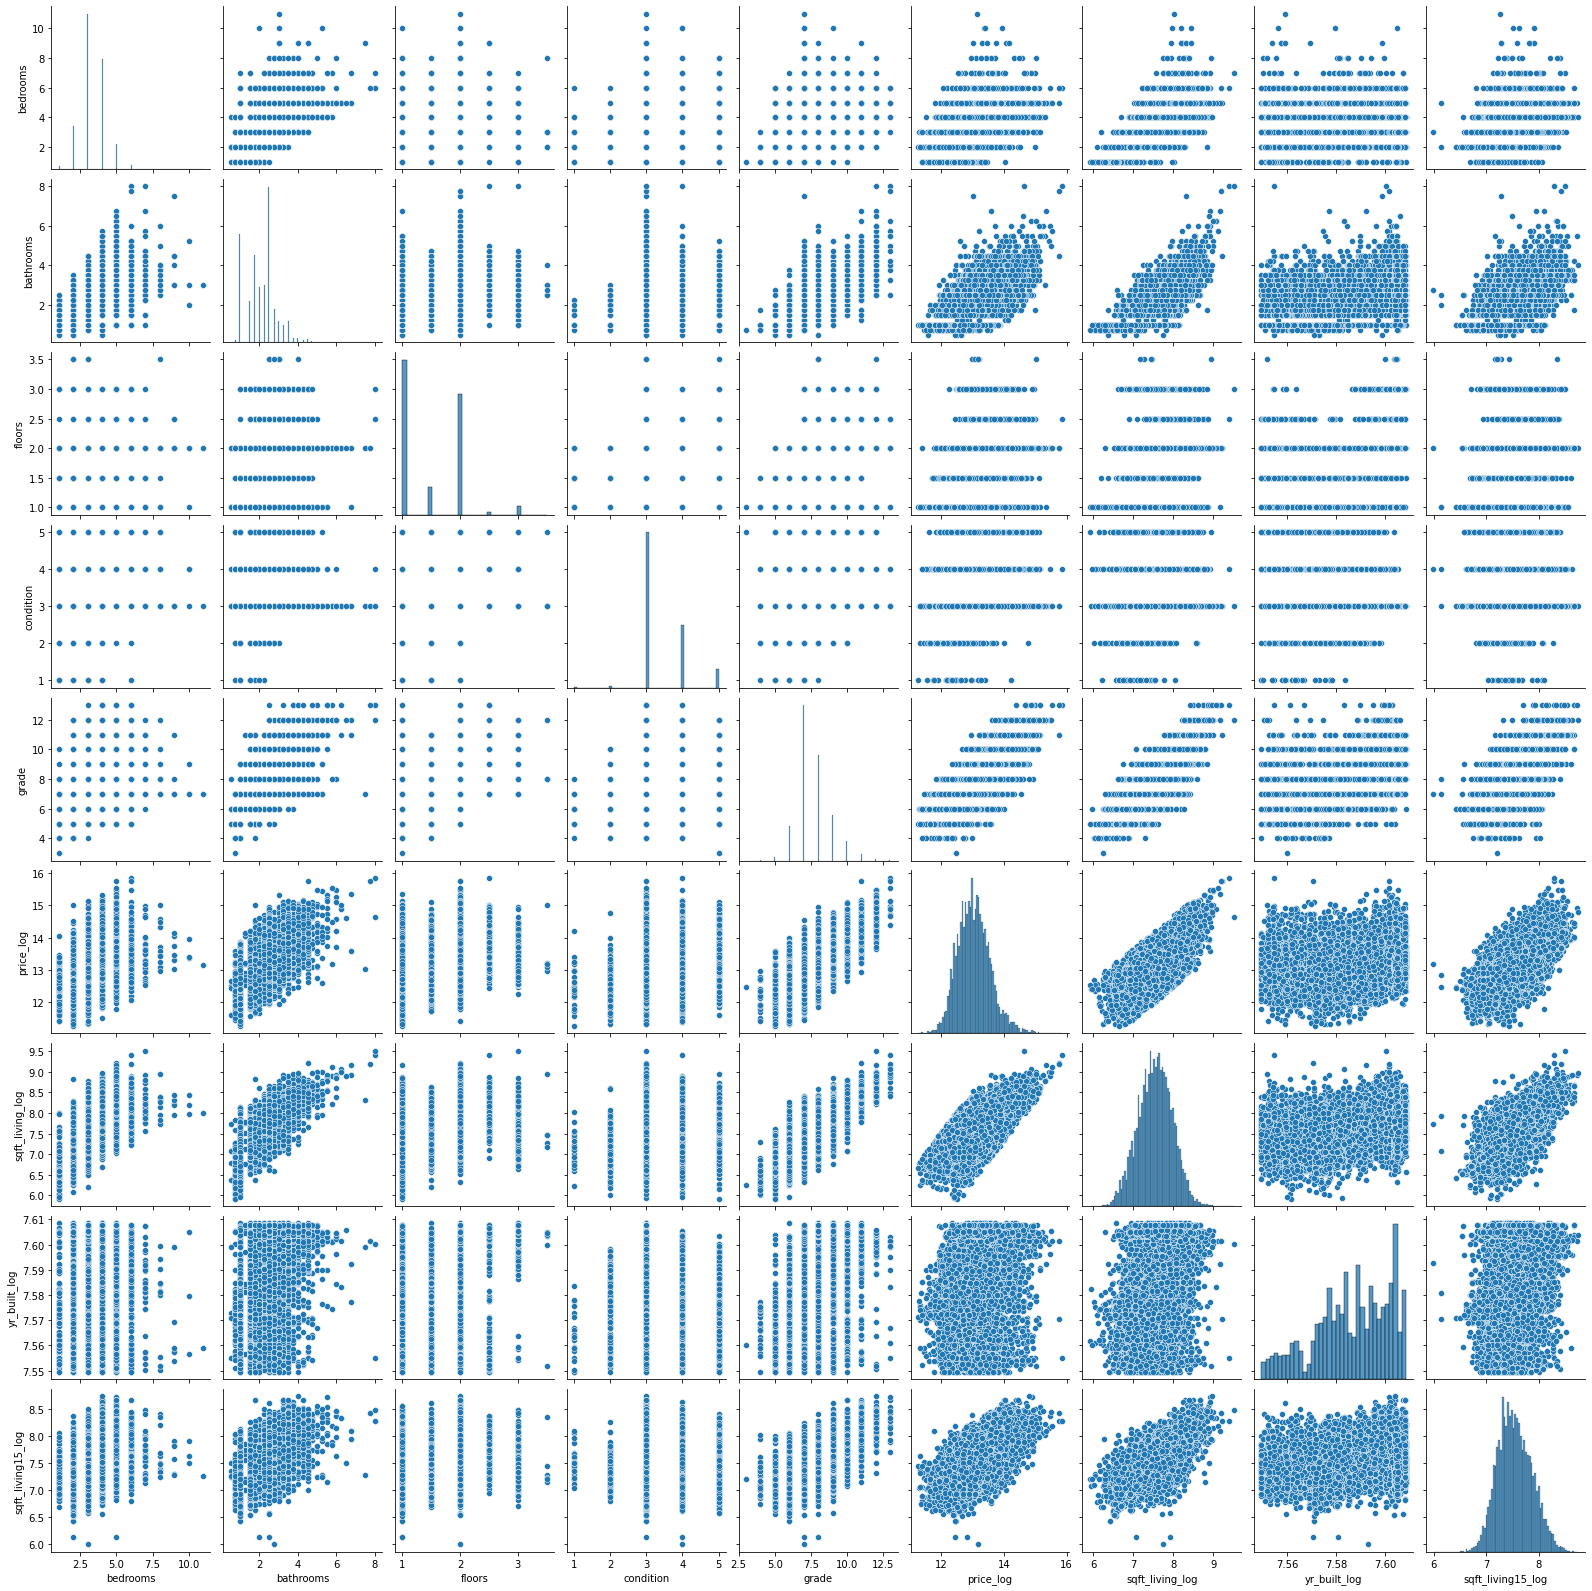

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
df.corr()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,sqft_living15_log
bedrooms,1.000000,0.531992,0.188965,0.021090,0.372331,0.353855,0.640973,0.162800,0.421023
bathrooms,0.531992,1.000000,0.505269,-0.129173,0.666786,0.552530,0.762262,0.504772,0.570835
floors,0.188965,0.505269,1.000000,-0.266530,0.457093,0.313327,0.370592,0.486049,0.275082
condition,0.021090,-0.129173,-0.266530,1.000000,-0.147896,0.037918,-0.051408,-0.364010,-0.091826
grade,0.372331,0.666786,0.457093,-0.147896,1.000000,0.705399,0.744455,0.443423,0.688049
price_log,0.353855,0.552530,0.313327,0.037918,0.705399,1.000000,0.675040,0.079474,0.604376
sqft_living_log,0.640973,0.762262,0.370592,-0.051408,0.744455,0.675040,1.000000,0.349103,0.746153
yr_built_log,0.162800,0.504772,0.486049,-0.364010,0.443423,0.079474,0.349103,1.000000,0.331600
sqft_living15_log,0.421023,0.570835,0.275082,-0.091826,0.688049,0.604376,0.746153,0.331600,1.000000


There appears to be three pairs of features that show multicolinearity: sqft_living and bathrooms, sqft_living and grade, and sqft_living with sqft_living15. I'm going to first see how dropping bathroom will affect the model.

In [34]:
sec_cols = [
    'bedrooms', 'floors', 'condition', 'sqft_living_log', 'grade',
    'yr_built_log', 'sqft_living15_log'
]

sec_df = X_train[sec_cols]

sec_df_test = X_test[sec_cols]

In [35]:
scaler = StandardScaler()

sec_X_scaled = scaler.fit_transform(sec_df)
sec_X_scaled_df = pd.DataFrame(sec_X_scaled, columns=sec_df.columns)

X_test_scaled = scaler.transform(sec_df_test)

In [36]:
model_two = sm.OLS(y_train, sm.add_constant(sec_X_scaled)).fit()

model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3622.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:32:55   Log-Likelihood:                -3903.9
No. Observations:               14299   AIC:                             7824.
Df Residuals:                   14291   BIC:                             7884.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0534      0.003   4908.178      0.000      13.048      13.059
x1            -0.0306      0.004     -8.611      0.000      -0.038      -0.024
x2             0.0597      0.003     18.343      0.000       0.053       0.066
x3             0.0287      0.003      9.947      0.000       0.023       0.034
x4             0.1680      0.006     30.475      0.000       0.157       0.179
x5             0.2673      0.005     59.349      0.000       0.258       0.276
x6            -0.1706      0.003    -51.504      0.000      -0.177      -0.164
x7             0.0670      0.004     15.855      0.000       0.059       0.075
==============================================================================
Omnibus:                       24.480   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.414
Skew:                          -0.040   Prob(JB):                     6.76e-07
Kurtosis:                       3.203   Cond. No.                         4.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
lr = LinearRegression()

lr.fit(sec_X_scaled, y_train)

LinearRegression()

In [38]:
sec_train_preds = lr.predict(sec_X_scaled)
sec_test_preds = lr.predict(X_test_scaled)

In [39]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, sec_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, sec_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, sec_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, sec_test_preds, squared=False)}')

Train Scores:
R2: 0.6394948181155634
RMSE: 0.31793209882670725
-----
Test Scores:
R2: 0.6278849565057956
RMSE: 0.3180317847170735


In [40]:
fn.print_metrics(y_train, sec_train_preds, y_test, sec_test_preds, log=True)

Training Scores
----------
R2: 0.6395
RMSE: 225682.6784
MAE: 136646.9074

**********
Testing Scores
----------
R2: 0.6279
RMSE: 221034.2120
MAE: 133932.1115


Removing bathrooms due to colinearity diminished the model's performance slightly, less than 1%. Even though multicollinearity between the features has been reduced, let's see if combining bathroom with another column will impact the model.

### Model Refinement II

It makes the most sense to combine number of bathrooms to some relationship with number of bedrooms. Number of rooms is most likely relative to the size of the house/square footage. There are a few ways I could create a column with this relationship, but since bedrooms seem to be a significant feature, I will create a new column with the ratio of bathrooms to bedrooms instead of adding them together and creating a total number of rooms column.

In [41]:
#making a copy of our dataframe to add a new column that is the ratio of bathrooms to bedrooms

df2 = df.copy(deep=True)

In [42]:
df2['bath_bed_ratio'] = df2['bathrooms']/df2['bedrooms']

In [43]:
df2.head()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,sqft_living15_log,bath_bed_ratio
1,3,2.25,2.0,3,7,13.195614,7.851661,7.576097,7.432484,0.750000
2,2,1.00,1.0,3,6,12.100712,6.646391,7.566828,7.908387,0.500000
3,4,3.00,1.0,5,7,13.311329,7.580700,7.583248,7.215240,0.750000
4,3,2.00,1.0,3,8,13.142166,7.426549,7.594381,7.495542,0.666667
5,4,4.50,1.0,3,11,14.022525,8.597851,7.601402,8.468003,1.125000


In [44]:
y = df2['price_log']
X = df2.drop('price_log', axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [46]:
thr_cols = [
    'bedrooms', 'floors', 'condition', 'grade', 'sqft_living_log',
    'yr_built_log', 'sqft_living15_log', 'bath_bed_ratio'
]

thr_df = X_train[thr_cols]

thr_df_test = X_test[thr_cols]

In [47]:
scaler = StandardScaler()

thr_X_scaled = scaler.fit_transform(thr_df)
thr_X_scaled_df = pd.DataFrame(thr_X_scaled, columns=thr_df.columns)

X_test_scaled = scaler.transform(thr_df_test)

In [48]:
model_three = sm.OLS(y_train, sm.add_constant(thr_X_scaled)).fit()

model_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3252.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:32:55   Log-Likelihood:                -3784.9
No. Observations:               14299   AIC:                             7588.
Df Residuals:                   14290   BIC:                             7656.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0534      0.003   4949.022      0.000      13.048      13.059
x1             0.0095      0.004      2.162      0.031       0.001       0.018
x2             0.0470      0.003     14.107      0.000       0.040       0.054
x3             0.0267      0.003      9.294      0.000       0.021       0.032
x4             0.2618      0.004     58.420      0.000       0.253       0.271
x5             0.1348      0.006     22.957      0.000       0.123       0.146
x6            -0.1842      0.003    -54.171      0.000      -0.191      -0.178
x7             0.0708      0.004     16.866      0.000       0.063       0.079
x8             0.0595      0.004     15.487      0.000       0.052       0.067
==============================================================================
Omnibus:                       30.649   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.983
Skew:                          -0.050   Prob(JB):                     1.54e-08
Kurtosis:                       3.225   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lr = LinearRegression()

lr.fit(thr_X_scaled, y_train)

LinearRegression()

In [50]:
thr_train_preds = lr.predict(thr_X_scaled)
thr_test_preds = lr.predict(X_test_scaled)

In [51]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, thr_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, thr_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, thr_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, thr_test_preds, squared=False)}')

Train Scores:
R2: 0.6454455498841238
RMSE: 0.3152971837202544
-----
Test Scores:
R2: 0.634074505482825
RMSE: 0.3153757140329886


In [52]:
fn.print_metrics(y_train, thr_train_preds, y_test, thr_test_preds, log=True)

Training Scores
----------
R2: 0.6454
RMSE: 222245.7289
MAE: 135318.9275

**********
Testing Scores
----------
R2: 0.6341
RMSE: 217727.5560
MAE: 132301.9839


In [54]:
df2.corr()

,bedrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,sqft_living15_log,bath_bed_ratio
bedrooms,1.000000,0.188965,0.021090,0.372331,0.353855,0.640973,0.162800,0.421023,-0.233316
floors,0.188965,1.000000,-0.266530,0.457093,0.313327,0.370592,0.486049,0.275082,0.421927
condition,0.021090,-0.266530,1.000000,-0.147896,0.037918,-0.051408,-0.364010,-0.091826,-0.160780
grade,0.372331,0.457093,-0.147896,1.000000,0.705399,0.744455,0.443423,0.688049,0.407140
price_log,0.353855,0.313327,0.037918,0.705399,1.000000,0.675040,0.079474,0.604376,0.303651
sqft_living_log,0.640973,0.370592,-0.051408,0.744455,0.675040,1.000000,0.349103,0.746153,0.303512
yr_built_log,0.162800,0.486049,-0.364010,0.443423,0.079474,0.349103,1.000000,0.331600,0.426419
sqft_living15_log,0.421023,0.275082,-0.091826,0.688049,0.604376,0.746153,0.331600,1.000000,0.262926
bath_bed_ratio,-0.233316,0.421927,-0.160780,0.407140,0.303651,0.303512,0.426419,0.262926,1.000000


Again, not much difference from the initial model. It improved the r2 score from the first iteration, but it is slightly less than the initial model. Additionally, in the initial model the RMSE was slightly lower. By combining bathrooms to bedrooms through ratio, multicolinearity between sqft living and bathrooms was addressed. It makes sense to keep bathrooms in as a feature, whether separately or as a ratio to bedrooms as it does have a low p-value.

### Model Refinement III

Keeping in mind that there is still multicolinearity between sqft_living with grade and sqft_living15, I will explore how doing the same process of finding the ratio between sqft_living and sqft_living15 will affect the model. I will leave grade in as a feature on it's own for now. There isn't a natural relationship between grade and another feature where it makes sense to combine right away.

In [55]:
df3 = df.copy(deep=True)

In [56]:
df3['sqft_living_ratio_log'] = df3['sqft_living_log']/df3['sqft_living15_log']

In [57]:
df3.head()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,sqft_living15_log,sqft_living_ratio_log
1,3,2.25,2.0,3,7,13.195614,7.851661,7.576097,7.432484,1.056398
2,2,1.00,1.0,3,6,12.100712,6.646391,7.566828,7.908387,0.840423
3,4,3.00,1.0,5,7,13.311329,7.580700,7.583248,7.215240,1.050651
4,3,2.00,1.0,3,8,13.142166,7.426549,7.594381,7.495542,0.990795
5,4,4.50,1.0,3,11,14.022525,8.597851,7.601402,8.468003,1.015334


In [58]:
y = df3['price_log']
X = df3.drop('price_log', axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [79]:
for_cols = [
    'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built_log',
    'sqft_living_log', 'sqft_living_ratio_log'
]

for_df = X_train[for_cols]

for_df_test = X_test[for_cols]

In [80]:
scaler = StandardScaler()

for_X_scaled = scaler.fit_transform(for_df)
for_X_scaled_df = pd.DataFrame(for_X_scaled, columns=for_df.columns)

X_test_scaled = scaler.transform(for_df_test)

In [81]:
model_four = sm.OLS(y_train, sm.add_constant(for_X_scaled)).fit()

model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3263.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:38:21   Log-Likelihood:                -3768.9
No. Observations:               14299   AIC:                             7556.
Df Residuals:                   14290   BIC:                             7624.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0534      0.003   4954.586      0.000      13.048      13.059
x1            -0.0401      0.004    -11.238      0.000      -0.047      -0.033
x2             0.0765      0.005     16.454      0.000       0.067       0.086
x3             0.0475      0.003     14.332      0.000       0.041       0.054
x4             0.0266      0.003      9.298      0.000       0.021       0.032
x5             0.2574      0.005     57.115      0.000       0.249       0.266
x6            -0.1860      0.003    -54.505      0.000      -0.193      -0.179
x7             0.2214      0.006     36.213      0.000       0.209       0.233
x8            -0.0605      0.004    -16.797      0.000      -0.068      -0.053
==============================================================================
Omnibus:                       25.842   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.582
Skew:                          -0.050   Prob(JB):                     3.77e-07
Kurtosis:                       3.199   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
lr = LinearRegression()

lr.fit(for_X_scaled, y_train)

LinearRegression()

In [83]:
for_train_preds = lr.predict(for_X_scaled)
for_test_preds = lr.predict(X_test_scaled)

In [84]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, for_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, for_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, for_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, for_test_preds, squared=False)}')

Train Scores:
R2: 0.6462414152308575
RMSE: 0.314943112465415
-----
Test Scores:
R2: 0.6351874041595922
RMSE: 0.31489576867698293


In [85]:
fn.print_metrics(y_train, for_train_preds, y_test, for_test_preds, log=True)

Training Scores
----------
R2: 0.6462
RMSE: 220046.4907
MAE: 135106.5160

**********
Testing Scores
----------
R2: 0.6352
RMSE: 215058.6925
MAE: 132227.7060


In [86]:
df3.corr()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,sqft_living15_log,sqft_living_ratio_log
bedrooms,1.000000,0.531992,0.188965,0.021090,0.372331,0.353855,0.640973,0.162800,0.421023,0.473801
bathrooms,0.531992,1.000000,0.505269,-0.129173,0.666786,0.552530,0.762262,0.504772,0.570835,0.478552
floors,0.188965,0.505269,1.000000,-0.266530,0.457093,0.313327,0.370592,0.486049,0.275082,0.235700
condition,0.021090,-0.129173,-0.266530,1.000000,-0.147896,0.037918,-0.051408,-0.364010,-0.091826,0.030275
grade,0.372331,0.666786,0.457093,-0.147896,1.000000,0.705399,0.744455,0.443423,0.688049,0.315595
price_log,0.353855,0.552530,0.313327,0.037918,0.705399,1.000000,0.675040,0.079474,0.604376,0.309844
sqft_living_log,0.640973,0.762262,0.370592,-0.051408,0.744455,0.675040,1.000000,0.349103,0.746153,0.634566
yr_built_log,0.162800,0.504772,0.486049,-0.364010,0.443423,0.079474,0.349103,1.000000,0.331600,0.138444
sqft_living15_log,0.421023,0.570835,0.275082,-0.091826,0.688049,0.604376,0.746153,0.331600,1.000000,-0.040219
sqft_living_ratio_log,0.473801,0.478552,0.235700,0.030275,0.315595,0.309844,0.634566,0.138444,-0.040219,1.000000


By dropping sqft_living15 and combining it through ratio with sqft_living, it didn't impact our model r2 scores and RMSE much at all. By using the sqft_living ratio, it did reduce multicolinearity between this and sqft_living.

### Model Refinement

## Evaluation

From the initial and iterations, the models were able to explain at least 63% of the variance in the training and testing sets. Although I can see the magnitude of the predictors in the dataset, using home specific features alone inhibits the ability to have a greater understanding of what features have the greatest effect. It's generally understood that location is an important factor for homeowners, which is why it is helpful to understand Jonny's analysis as well.

We are able to present stakeholders what features influence price, however, when applying our model to a new subest of data, there is a large error when looking at RMSE in dollars. 

To further evaluate my model, I'm checking to see if the residuals are normally distributed and if the errors display any heteroscedasticity.

In [87]:
import statsmodels.api as sm
import scipy.stats as stats

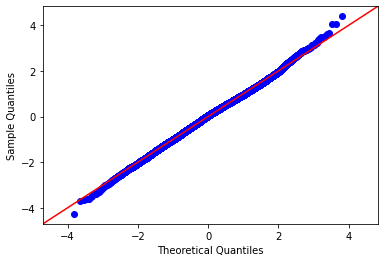

In [88]:
fig = sm.graphics.qqplot(model_four.resid, dist=stats.norm, line='45', fit=True)

It looks very robust, with a few violations towards the ends or tails of the data.

ValueError: x and y must be the same size

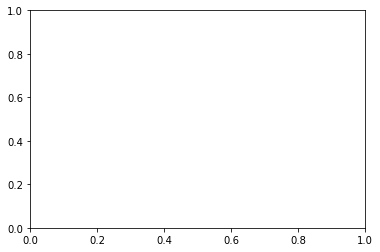

In [92]:
plt.scatter(model_four.predict(X), model_four.resid)
plt.plot(model_four.predict(X)), [0 for i in range(len(df))]

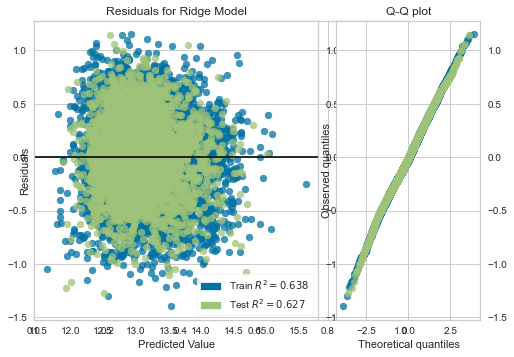

In [93]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model_four = Ridge()
visualizer = ResidualsPlot(model_four)

visualizer = ResidualsPlot(model_four, hist=False, qqplot=True)
visualizer.fit(for_df, y_train)
visualizer.score(for_df_test, y_test)
visualizer.show();